_____
# **DECISION TREES**
________

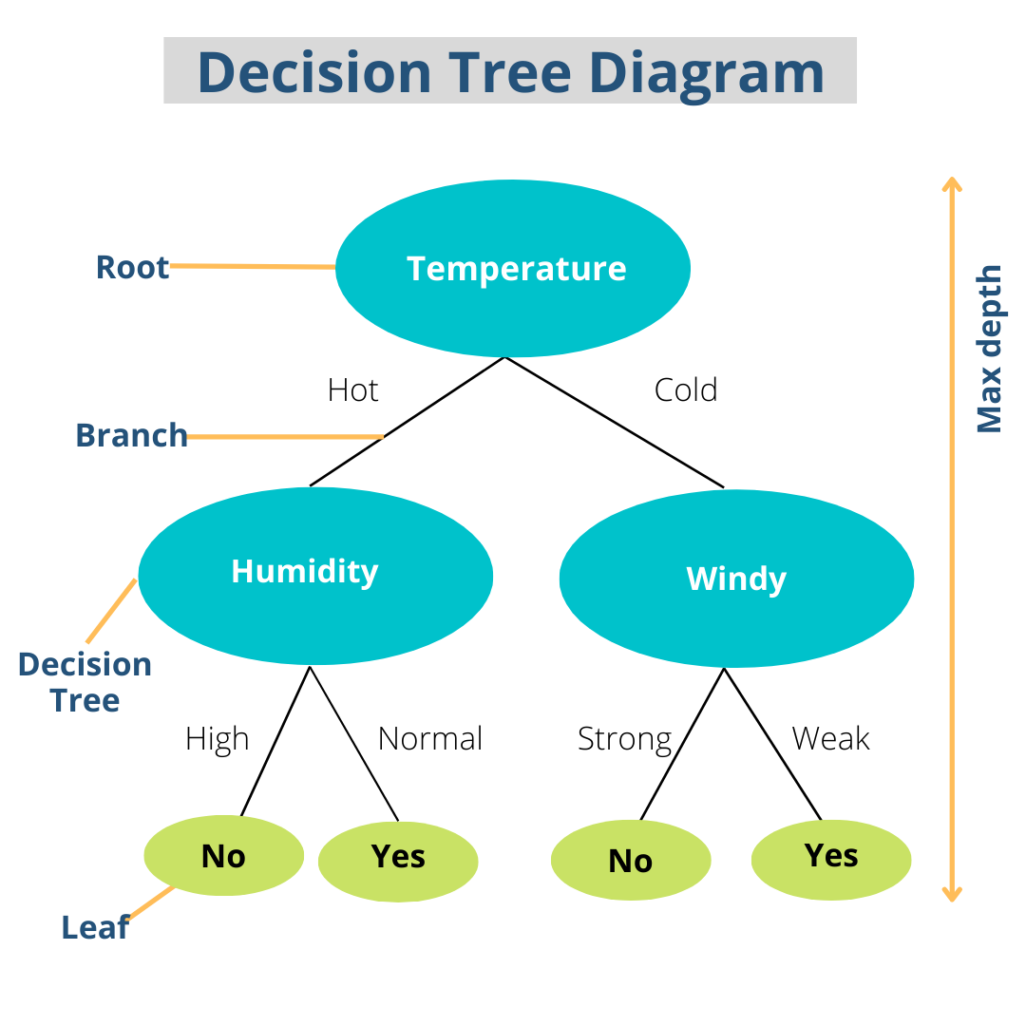

A decision tree is a supervised machine learning approach for classification and regression applications.  It simulates choices and their potential effects, including as utility, resource costs, and chance event outcomes.  It is a tree structure that resembles a flow chart where:

- Each internal node represents a "test" or "decision" on an attribute
- Each branch represents the outcome of the test (e.g. yes or no)
- Each leaf node represents a class label (for classification) or a continuous value (for regression).

Decision trees split data into subsets based on the feature that results in the greatest "purity" in the subsets. The splitting continues recursively to form the tree.

The key mathematical concepts behind decision trees are entropy and information gain (for classification problems) or variance reduction (for regression problems)

### 1. **Entropy (for Classification):**



Entropy measures the uncertainty or impurity of a set of examples. The formula for entropy \( H(D) \) for a dataset \( D \) is:

   $$
   H(D) = - \sum_{i=1}^{c} p_i \log_2(p_i)
   $$

   Where:
   - \( p_i \) is the proportion of class \( i \) in the dataset \( D \).
   - \( c \) is the total number of different classes.

   The goal is to split the data into subsets that result in the lowest possible entropy.


### 2. **Information Gain (for Classification):** 

 Information gain measures how well a feature splits the data. It is calculated by subtracting the weighted average entropy of the child nodes from the entropy of the parent node:

   $$
   \text{Information Gain}(D, A) = H(D) - \sum_{v \in \text{Values}(A)} \frac{|D_v|}{|D|} H(D_v)
   $$

   Where:
   - \( D \) is the dataset.
   - \( A \) is a feature.
   - \( D_v \) is the subset of \( D \) where feature \( A \) has value \( v \).
   - \( |D_v| \) is the number of instances in \( D_v \).

   The feature with the highest information gain is chosen for splitting the dataset.


### 3. **Gini Index (Alternative to Entropy):**  
   The Gini index is another impurity measure that can be used in decision trees. It’s less computationally expensive than entropy. The Gini impurity for a dataset \( D \) is:

   $$
   Gini(D) = 1 - \sum_{i=1}^{c} p_i^2
   $$

   Where \( p_i \) is the proportion of class \( i \) in the dataset \( D \). The feature that minimizes the Gini impurity is selected for splitting.


### 4. **Regression Trees:**  

 For regression tasks, decision trees split data based on reducing the **variance** in the target variable. The objective is to find the feature that minimizes the variance of the target within the subsets.



## **Task For this Notebook**

- The task for this notebook is a classification task using the **Iris dataset**, a well-known dataset in machine learning. The goal is to predict the species of flowers based on features such as petal length, petal width, sepal length, and sepal width.


### Required Libraries

The libraries required to achieve the task of this notebook are:

- **pandas** → Load and manipulate structured data (though not strictly needed for the Iris dataset, it's useful for custom datasets).
- **numpy** → Handle numerical operations and array data.
- **matplotlib.pyplot** → Create visualizations like plotting the decision tree.
- **sklearn.datasets** → Access built-in datasets like the Iris dataset.
- **sklearn.model_selection** → Split the dataset into training and testing sets.
- **sklearn.tree** → Build and visualize the Decision Tree model.
- **sklearn.metrics** → Evaluate the model using accuracy, classification report, etc.


### Import Libraries

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


### Load Data



In [29]:
iris = load_iris()

# Convert the data into a pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Data Types and Columns (Data Exploration)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Data Cleaning

In [31]:
# Number of missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [32]:
# Number of duplicates


duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 1


Duplicates were found so we must drop it

In [33]:
df = df.drop_duplicates()

### Listing the columns of the data set

The columns in this data set are as follows;

In [34]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

### Initializing the Features and Target


In [35]:
X = iris.data 
y = iris.target  

### Split Data



In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Initialize Decision Tree Classifier

In [37]:
clf = DecisionTreeClassifier(random_state=42)

### Train Classifier


In [38]:
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


Accuracy = 1.00 (or 100%) → Every single prediction the model made was correct on the 30 test samples.

In [39]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



This classification report shows that the decision tree model performed perfectly on the test set

### Visualisation

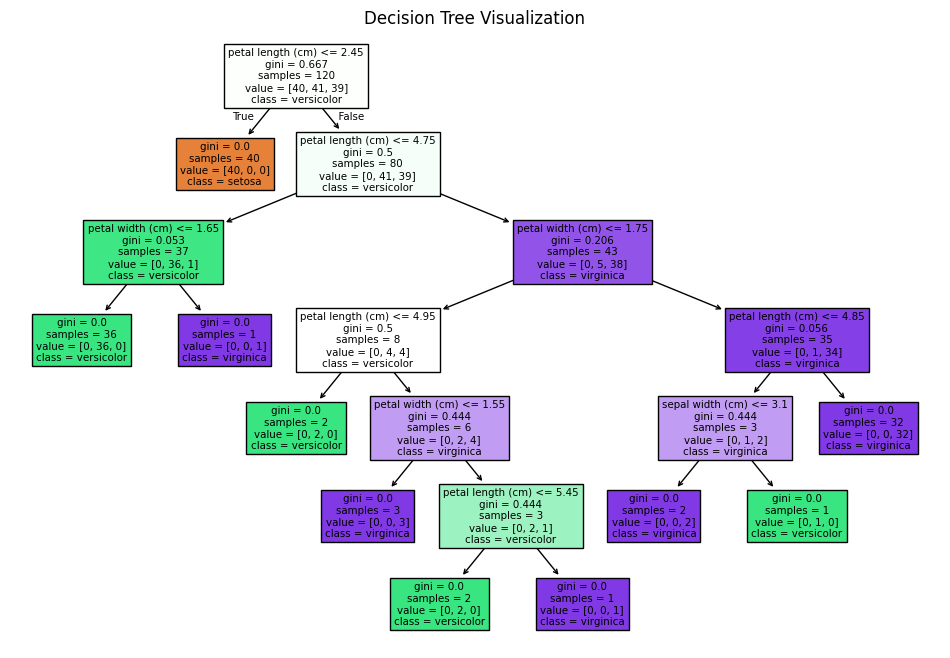

In [40]:
# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Visualization")
plt.show()

**Key Observations from Visualisation**

- The decision tree effectively classifies Iris Setosa, since its features are distinctly different from the other two species.

- The Versicolor and Virginica classification requires more complex splits due to overlapping feature distributions.

- The presence of impurity (Gini > 0) in some nodes suggests that a more complex model (like Random Forest) may improve accuracy by reducing misclassifications.  

## **Conclusion of Notebook**

The iris species was successfully and 100% accurately categorized by the decision tree model on the test set.  Iris Setosa can be easily separated thanks to its unique features, whereas Versicolor and Virginica need more intricate splits because their feature ranges overlap, as the visualization illustrates.  Despite the model's flawless performance in this instance, the existence of non-zero Gini impurity in certain internal nodes suggests that a more resilient model, such as a Random Forest, would provide superior generalization, particularly on more intricate or noisy datasets.
